In [13]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [15]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3300,spam,RCT' THNQ Adrian for U text. Rgds Vatian,NaN,NaN,NaN
4459,ham,This is wishing you a great day. Moji told me ...,NaN,NaN,NaN
895,ham,Superb Thought- \Be grateful that u dont have ...,NaN,NaN,NaN
5359,ham,This is ur face test ( 1 2 3 4 5 6 7 8 9 &lt;...,NaN,NaN,NaN
5425,ham,Otherwise had part time job na-tuition..,NaN,NaN,NaN


In [16]:
df.shape

(5572, 5)

In [ ]:
# 1. Data Cleaning
# 2. EDA (Exploratory Data Analysis)
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website 
# 8. Deployment

## 1. Data Cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
# drop last 3 columns which are not required for our analysis
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [20]:
df.sample(5)

,v1,v2
5310,ham,"yeah, that's what I was thinking"
3249,ham,"Babe, I need your advice"
1060,ham,I'm working technical support :)voice process....
1343,ham,Crazy ar he's married. ÌÏ like gd looking guys...
2292,ham,:-( that's not v romantic!


In [22]:
# rename the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
3136,ham,You're right I have now that I think about it
1885,ham,I think asking for a gym is the excuse for laz...
4801,ham,Reverse is cheating. That is not mathematics.
1986,ham,S..antha num corrct dane
3874,ham,Okie but i scared u say i fat... Then u dun wa...


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
df['target'] = encoder.fit_transform(df['target'])

In [26]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [28]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [30]:
# remove duplicate values
df = df.drop_duplicates(keep='first')

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.shape

(5169, 2)

## 2. EDA (Exploratory Data Analysis)

In [33]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

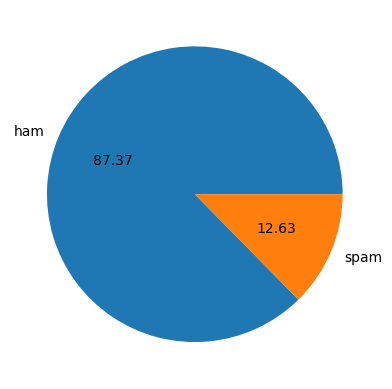

In [37]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [41]:
import nltk

In [42]:
!pip install nltk

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
df['num_characters'] = df['text'].apply(len)

In [50]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [54]:
# number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [55]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [59]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [61]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [64]:
# spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [65]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

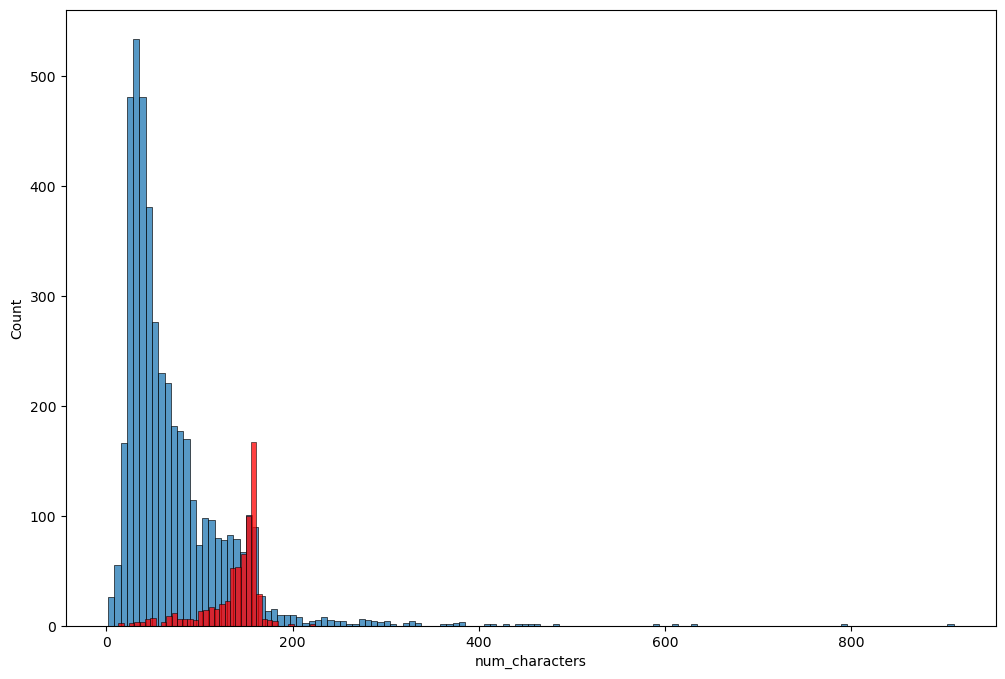

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

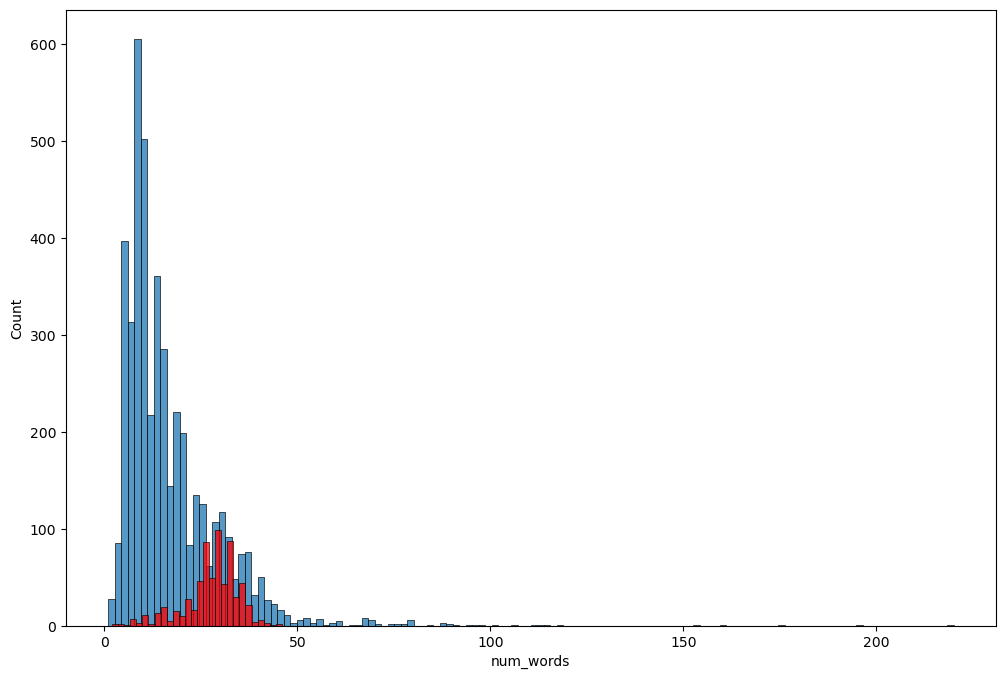

In [70]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

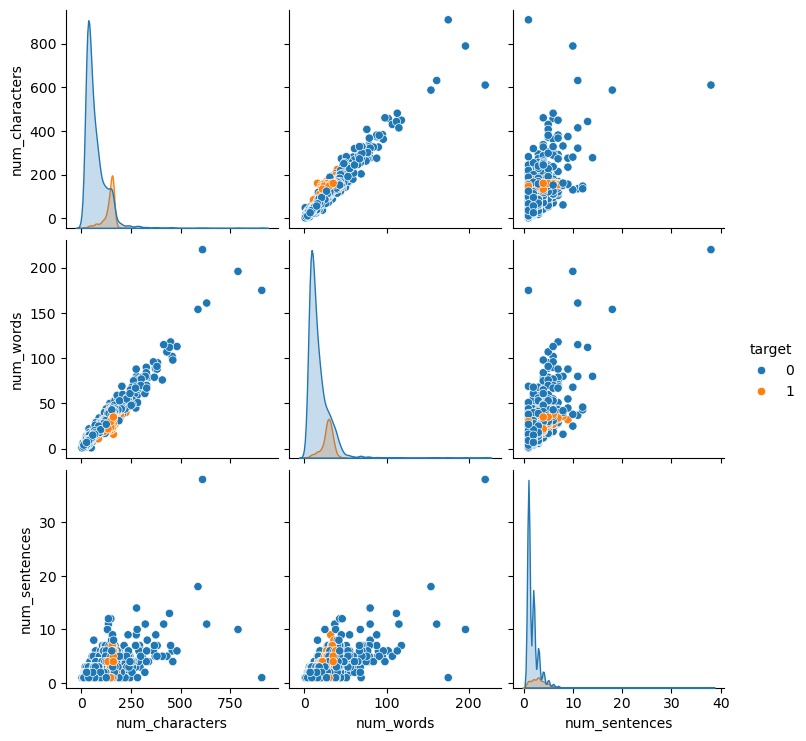

In [71]:
sns.pairplot(df, hue='target')

<Axes: >

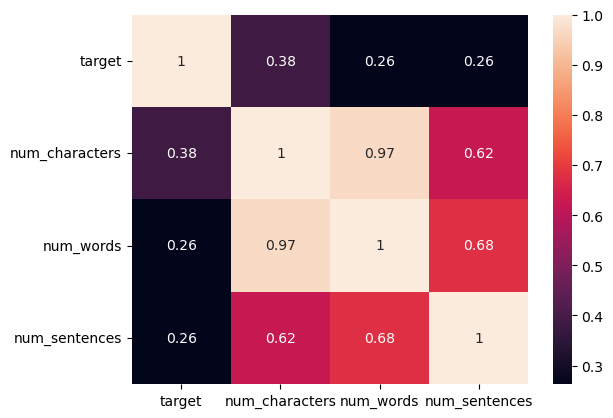

In [76]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
## 3. Data Preprocessing
 # Lowercase the text
 # Tokenization
 # Removing special characters
 # Removing stopwords and punctuation
 # Stemming/Lemmatization

In [104]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

            
    return " ".join(y)

In [89]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [90]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [108]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [107]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [101]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('running')

'run'

In [110]:
df['transformed_text'] = df['text'].apply(transform_text)

In [111]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [120]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [121]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

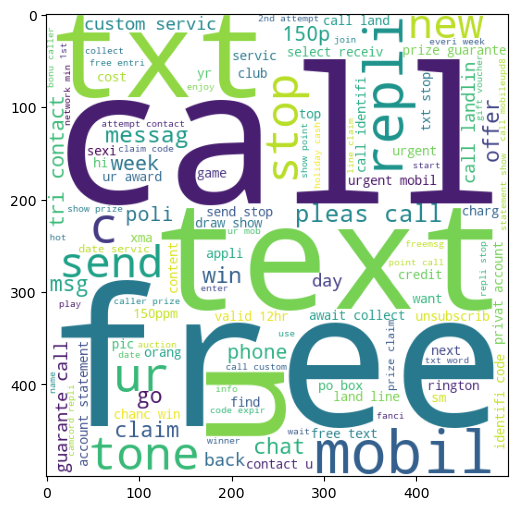

In [123]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [124]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

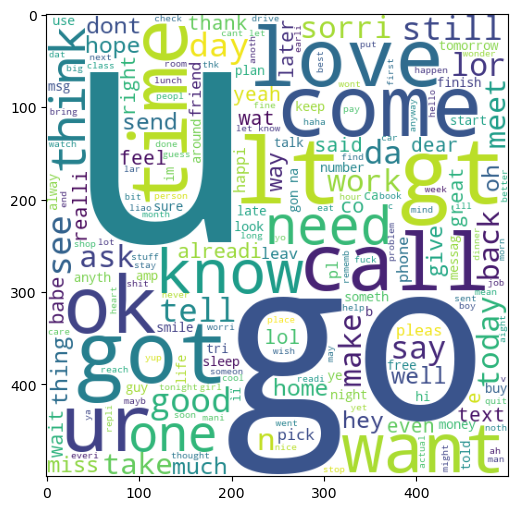

In [125]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [128]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [130]:
len(spam_corpus)

9939

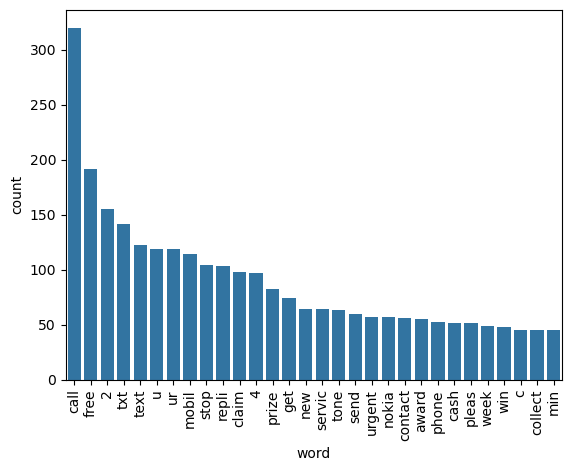

In [140]:
from collections import Counter 
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=word_counts)
plt.xticks(rotation=90)
plt.show()

In [142]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [143]:
len(ham_corpus)

35404

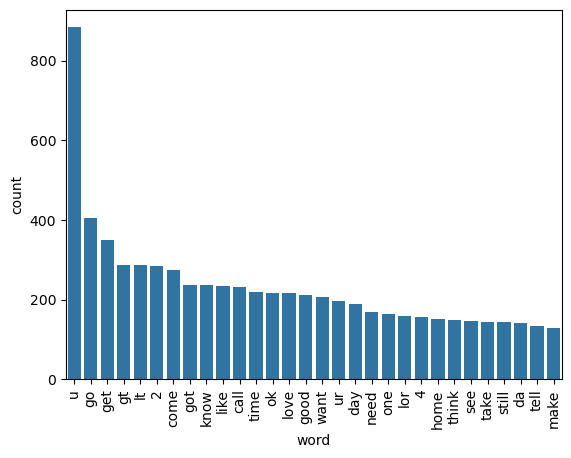

In [144]:
from collections import Counter 
word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=word_counts)
plt.xticks(rotation=90)
plt.show()

In [145]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [146]:
## 4. Model Building

In [354]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [355]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [312]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [356]:
#appending the num character col to X
X = np.hstack((X, np.array(df['num_characters']).reshape(-1,1)))

In [357]:
X.shape

(5169, 3001)

In [315]:
Y = df['target'].values

In [316]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [358]:
from sklearn.model_selection import train_test_split

In [359]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [360]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [361]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [362]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred1))
print(confusion_matrix(Y_test, Y_pred1))
print(precision_score(Y_test, Y_pred1))

0.8945841392649904
[[808  88]
 [ 21 117]]
0.5707317073170731


In [363]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))
print(precision_score(Y_test, Y_pred2))

0.9390715667311412
[[896   0]
 [ 63  75]]
1.0


In [323]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred3))
print(confusion_matrix(Y_test, Y_pred3))
print(precision_score(Y_test, Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [237]:
# tfidf + MultinomialNB (mnb) gives the best results

In [176]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   -- ------------------------------------- 3.7/72.0 MB 20.4 MB/s eta 0:00:04
   ---- ----------------------------------- 8.1/72.0 MB 21.4 MB/s eta 0:00:03
   ------ --------------------------------- 12.3/72.0 MB 20.6 MB/s eta 0:00:03
   -------- ------------------------------- 15.7/72.0 MB 19.8 MB/s eta 0:00:03
   ----------- ---------------------------- 20.4/72.0 MB 20.3 MB/s eta 0:00:03
   -------------- ------------------------- 25.4/72.0 MB 20.7 MB/s eta 0:00:03
   ---------------- ----------------------- 30.1/72.0 MB 21.1 MB/s eta 0:00:02
   ------------------- -------------------- 34.3/72.0 MB 21.0 MB/s eta 0:00:02
   -------------------- ------------------- 37.7/72.0 MB 20.4 MB/s eta 0:00:02
   ----------------------- ---------------- 41.4/72.0 MB 20.1 MB/s eta 0:00:02
   ------------------------- -------------- 45.1/72.0 MB 19.8 MB/s eta 0:00:02
   -------------------------- ------------- 48.0/72.0 MB 19.3 M

In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [325]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()  
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier()   

In [326]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb
}

In [327]:
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    return accuracy, precision

In [328]:
train_classifier(svc, X_train, Y_train, X_test, Y_test)

d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.8665377176015474, 0.0)

In [329]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    currency_accuracy, currency_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)

    print("For", name)
    print("Accuracy :", currency_accuracy)
    print("Precision :", currency_precision)

    accuracy_scores.append(currency_accuracy)
    precision_scores.append(currency_precision)

d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For SVC
Accuracy : 0.8665377176015474
Precision : 0.0
For KN
Accuracy : 0.9332688588007737
Precision : 0.8053097345132744
For NB
Accuracy : 0.9390715667311412
Precision : 1.0
For DT
Accuracy : 0.9468085106382979
Precision : 0.8807339449541285
For LR
Accuracy : 0.960348162475822
Precision : 0.9619047619047619
For RF
Accuracy : 0.971953578336557
Precision : 0.9823008849557522
For AdaBoost
Accuracy : 0.9448742746615088
Precision : 0.8932038834951457
For BgC
Accuracy : 0.960348162475822
Precision : 0.8592592592592593
For ETC
Accuracy : 0.97678916827853
Precision : 0.975
For GBDT
Accuracy : 0.9497098646034816
Precision : 0.93
For XGB
Accuracy : 0.9738878143133463
Precision : 0.9586776859504132


In [330]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [331]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.939072,1.000000
5,RF,0.971954,0.982301
8,ETC,0.976789,0.975000
4,LR,0.960348,0.961905
10,XGB,0.973888,0.958678
9,GBDT,0.949710,0.930000
6,AdaBoost,0.944874,0.893204
3,DT,0.946809,0.880734
7,BgC,0.960348,0.859259
1,KN,0.933269,0.805310


In [332]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [333]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.939072
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,LR,Accuracy,0.960348
4,XGB,Accuracy,0.973888
5,GBDT,Accuracy,0.949710
6,AdaBoost,Accuracy,0.944874
7,DT,Accuracy,0.946809
8,BgC,Accuracy,0.960348
9,KN,Accuracy,0.933269


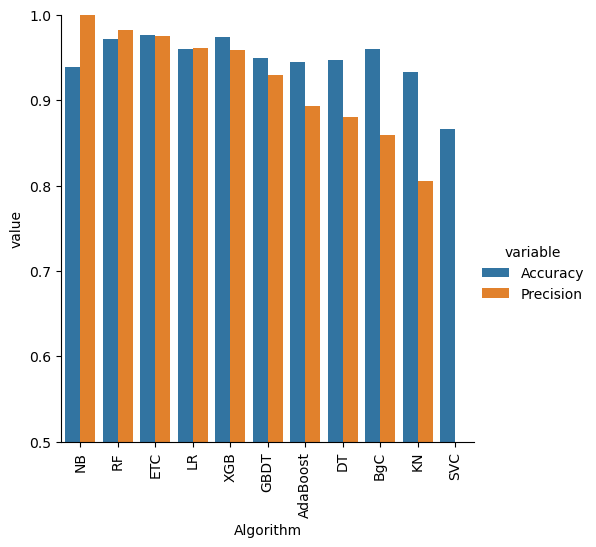

In [334]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0) 
plt.xticks(rotation='vertical')
plt.show()

In [249]:
# model improvement and tuning can be done further
# 1. Change the max_features parameter of TfidfVectorizer

In [335]:
temp_df_max = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [336]:
temp_df_scaling = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [337]:
new_df = performance_df.merge(temp_df_max,on='Algorithm')

In [338]:
new_df_scaled = new_df.merge(temp_df_scaling, on='Algorithm')

In [339]:
temp_df_characters = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [340]:
new_df_character = new_df_scaled.merge(temp_df_characters, on='Algorithm')

In [341]:
new_df_character

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,NB,0.939072,1.000000,0.939072,1.000000,0.939072,1.000000,0.939072,1.000000
1,RF,0.971954,0.982301,0.971954,0.982301,0.971954,0.982301,0.971954,0.982301
2,ETC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
3,LR,0.960348,0.961905,0.960348,0.961905,0.960348,0.961905,0.960348,0.961905
4,XGB,0.973888,0.958678,0.973888,0.958678,0.973888,0.958678,0.973888,0.958678
5,GBDT,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
6,AdaBoost,0.944874,0.893204,0.944874,0.893204,0.944874,0.893204,0.944874,0.893204
7,DT,0.946809,0.880734,0.946809,0.880734,0.946809,0.880734,0.946809,0.880734
8,BgC,0.960348,0.859259,0.960348,0.859259,0.960348,0.859259,0.960348,0.859259
9,KN,0.933269,0.805310,0.933269,0.805310,0.933269,0.805310,0.933269,0.805310


In [342]:
# Voting Classifier or Stacking Classifier can also be used to improve the performance further
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [345]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft') 

In [346]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [347]:
Y_pred = voting.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))

Accuracy: 0.9390715667311412
Precision: 1.0


In [348]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [349]:
from sklearn.ensemble import StackingClassifier

In [350]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [351]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9709864603481625
Precision 0.8913043478260869


In [364]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))